First rows of the time series:


,year,total_healthcare_cost_INR_millions
0,2010,1200
1,2011,1250
2,2012,1305
3,2013,1360
4,2014,1420



Data types and missing values:
year                                  int64
total_healthcare_cost_INR_millions    int64
dtype: object
year                                  0
total_healthcare_cost_INR_millions    0
dtype: int64

Cleaned copy saved.


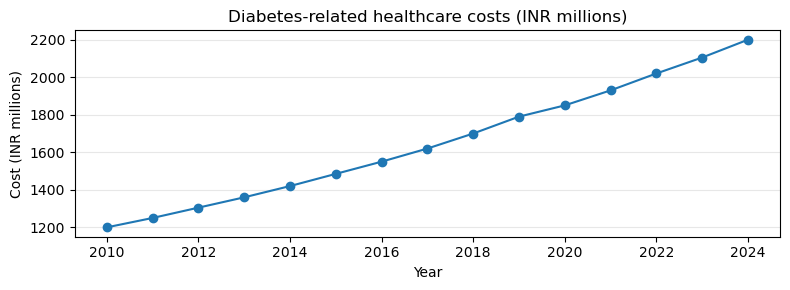

Trend plot saved to C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 plots\bc_cost_trend.png
Forecast table saved: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_forecast_ma3.csv


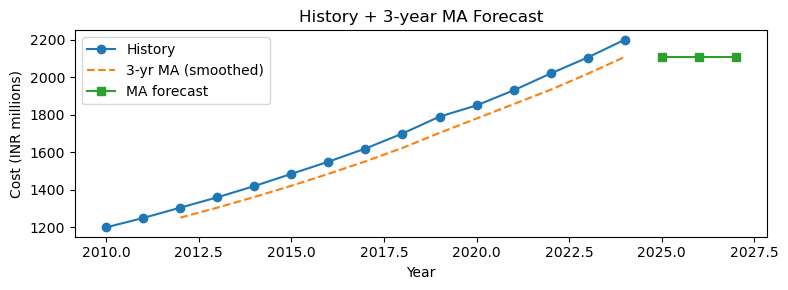

Forecast plot saved: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 plots\bc_forecast_plot.png
Summary stats saved: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_summary_stats.csv


In [2]:
# -----------------------------
# Project B+C: Forecasting + ROI - Day 1 code block
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# EDIT these paths if your folders are elsewhere
DATA_DIR = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data"
PLOTS_DIR = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 plots"
OUTPUT_DIR = DATA_DIR

# File name (adjust if yours is named differently)
ts_file = os.path.join(DATA_DIR, "diabetes_cost_timeseries.csv")

# 1) Load the dataset
df = pd.read_csv(ts_file)
print("First rows of the time series:")
display(df.head())

# 2) Basic checks
print("\nData types and missing values:")
print(df.dtypes)
print(df.isnull().sum())

# 3) Save a cleaned copy (standardised)
df.to_csv(os.path.join(OUTPUT_DIR, "diabetes_cost_timeseries_cleaned.csv"), index=False)
print("\nCleaned copy saved.")

# 4) Plot historical trend and save
plt.figure(figsize=(8,3))
plt.plot(df['year'], df['total_healthcare_cost_INR_millions'], marker='o')
plt.title("Diabetes-related healthcare costs (INR millions)")
plt.xlabel("Year"); plt.ylabel("Cost (INR millions)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "bc_cost_trend.png"))
plt.show()
print("Trend plot saved to", os.path.join(PLOTS_DIR, "bc_cost_trend.png"))

# 5) Simple 3-year moving average forecast (naive, easy to explain)
df['ma3'] = df['total_healthcare_cost_INR_millions'].rolling(window=3).mean()

# Forecast next 3 years using last available ma3 value (naive)
last_ma = df['ma3'].iloc[-1]
last_year = int(df['year'].iloc[-1])
forecast_years = [last_year + i for i in range(1,4)]
forecast_values = [last_ma for _ in forecast_years]

df_forecast = pd.DataFrame({
    'year': forecast_years,
    'forecast_INR_millions': forecast_values
})

# 6) Save forecast table
df_forecast.to_csv(os.path.join(OUTPUT_DIR, "diabetes_forecast_ma3.csv"), index=False)
print("Forecast table saved:", os.path.join(OUTPUT_DIR, "diabetes_forecast_ma3.csv"))

# 7) Plot forecast appended to history
plt.figure(figsize=(8,3))
plt.plot(df['year'], df['total_healthcare_cost_INR_millions'], marker='o', label='History')
plt.plot(df['year'], df['ma3'], linestyle='--', label='3-yr MA (smoothed)')
plt.plot(df_forecast['year'], df_forecast['forecast_INR_millions'], marker='s', label='MA forecast')
plt.legend()
plt.title("History + 3-year MA Forecast")
plt.xlabel("Year"); plt.ylabel("Cost (INR millions)")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "bc_forecast_plot.png"))
plt.show()
print("Forecast plot saved:", os.path.join(PLOTS_DIR, "bc_forecast_plot.png"))

# 8) Quick summary stats and save
summary = df['total_healthcare_cost_INR_millions'].describe().to_frame(name='value')
summary.to_csv(os.path.join(OUTPUT_DIR, "diabetes_cost_summary_stats.csv"))
print("Summary stats saved:", os.path.join(OUTPUT_DIR, "diabetes_cost_summary_stats.csv"))


In [3]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15 non-null     int64  
 1   total_healthcare_cost_INR_millions  15 non-null     int64  
 2   ma3                                 13 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 492.0 bytes


Index(['year', 'total_healthcare_cost_INR_millions', 'ma3'], dtype='object')

Updated Table:


,year,total_healthcare_cost_INR_millions,projected_savings_INR_millions,net_benefit,ROI_percent
0,2010,1200,120.000000,-1080.000000,-90.000000
1,2011,1250,132.500000,-1117.500000,-89.400000
2,2012,1305,146.629800,-1158.370200,-88.764000
3,2013,1360,161.978176,-1198.021824,-88.089840
4,2014,1420,179.271728,-1240.728272,-87.375230
5,2015,1485,198.726498,-1286.273502,-86.617744
6,2016,1550,219.870462,-1330.129538,-85.814809
7,2017,1620,243.588102,-1376.411898,-84.963697
8,2018,1700,270.954173,-1429.045827,-84.061519
9,2019,1790,302.416734,-1487.583266,-83.105210


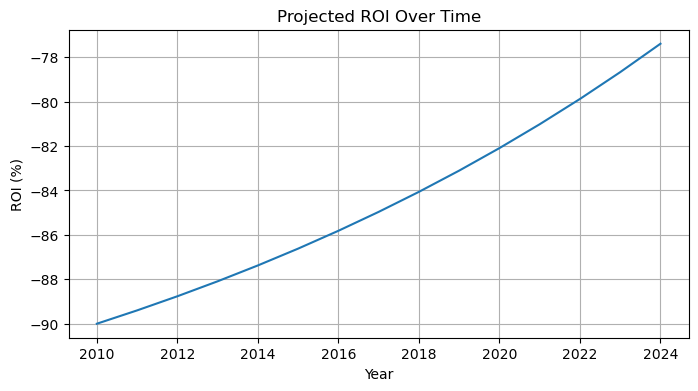

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your actual data
df = pd.read_csv(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_timeseries.csv"
)


# ---- Step 1: Create realistic savings projections ----

# 10% savings in year 1
initial_savings_rate = 0.10  

# 6% yearly growth in savings rate
growth_rate = 0.06  

# Create savings column
savings_rates = [initial_savings_rate * ((1 + growth_rate) ** i) for i in range(len(df))]
df["projected_savings_INR_millions"] = df["total_healthcare_cost_INR_millions"] * savings_rates

# ---- Step 2: Calculate Net Benefit and ROI ----
df["net_benefit"] = df["projected_savings_INR_millions"] - df["total_healthcare_cost_INR_millions"]
df["ROI_percent"] = (df["net_benefit"] / df["total_healthcare_cost_INR_millions"]) * 100

print("Updated Table:")
display(df)

# ---- Step 3: Plot ROI over years ----
plt.figure(figsize=(8,4))
plt.plot(df["year"], df["ROI_percent"])
plt.title("Projected ROI Over Time")
plt.xlabel("Year")
plt.ylabel("ROI (%)")
plt.grid(True)

# Save plot
plots_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 plots"
os.makedirs(plots_path, exist_ok=True)
plt.savefig(os.path.join(plots_path, "ROI_trend.png"))
plt.show()


In [6]:
df.to_csv(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_timeseries_cleaned.csv",
    index=False
)
print("File saved successfully.")


File saved successfully.


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os

# 1. Load cleaned dataset
df = pd.read_csv(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_timeseries_cleaned.csv"
)

# 2. Prepare regression model
X = df['year'].values.reshape(-1, 1)
y = df['total_healthcare_cost_INR_millions'].values

model = LinearRegression()
model.fit(X, y)

# 3. Create forecast for next 10 years
last_year = df['year'].max()
forecast_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

forecast_values = model.predict(forecast_years)

# 4. Build forecast dataframe
df_forecast = pd.DataFrame({
    "year": forecast_years.flatten(),
    "forecast_cost_INR_millions": forecast_values
})

# 5. Save it
save_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_forecast.csv"
df_forecast.to_csv(save_path, index=False)

print("Forecast saved successfully at:")
print(save_path)

df_forecast


Forecast saved successfully at:
C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_forecast.csv


,year,forecast_cost_INR_millions
0,2025,2224.761905
1,2026,2296.315476
2,2027,2367.869048
3,2028,2439.422619
4,2029,2510.976190
5,2030,2582.529762
6,2031,2654.083333
7,2032,2725.636905
8,2033,2797.190476
9,2034,2868.744048


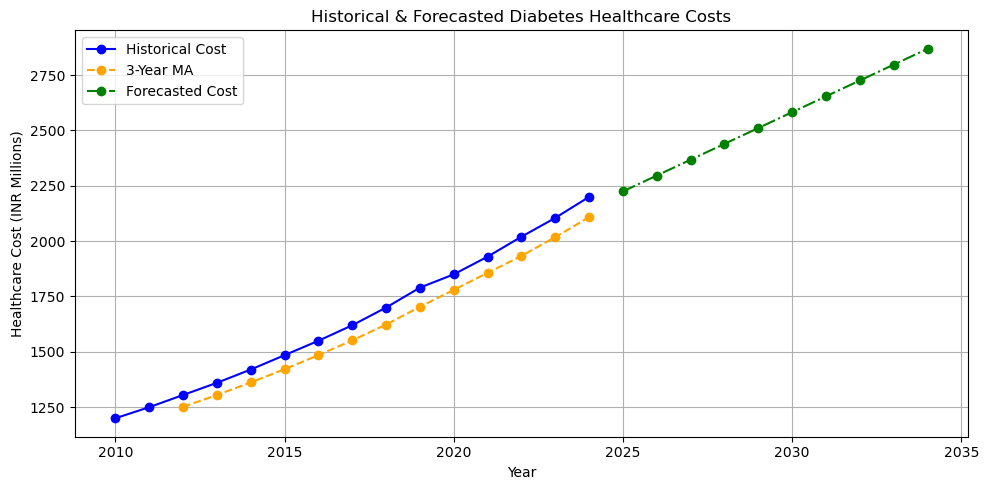

Plot saved at: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 Plots\forecast_plot.png


In [9]:
import matplotlib.pyplot as plt

# 1. Recompute 3-year moving average
df['ma3'] = df['total_healthcare_cost_INR_millions'].rolling(window=3).mean()

# 2. Merge historical data and forecast for plotting
df_plot = df.copy()  
df_plot_forecast = df_forecast.copy()

plt.figure(figsize=(10,5))

# Historical cost
plt.plot(df_plot['year'], df_plot['total_healthcare_cost_INR_millions'], marker='o', color='blue', label='Historical Cost')

# Moving average
plt.plot(df_plot['year'], df_plot['ma3'], marker='o', linestyle='--', color='orange', label='3-Year MA')

# Forecast
plt.plot(df_plot_forecast['year'], df_plot_forecast['forecast_cost_INR_millions'], marker='o', linestyle='-.', color='green', label='Forecasted Cost')

plt.xlabel('Year')
plt.ylabel('Healthcare Cost (INR Millions)')
plt.title('Historical & Forecasted Diabetes Healthcare Costs')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plot_save_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 Plots\forecast_plot.png"
plt.savefig(plot_save_path)
plt.show()
print(f"Plot saved at: {plot_save_path}")



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load forecasted costs
df_forecast = pd.read_csv(
    r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_forecast.csv"
)

# Intervention parameters
cost_per_person = 50000
population = 10000
reduction_pct = 0.10  # 10% reduction

# Program cost (constant for all years)
program_cost_total = cost_per_person * population

# Calculate costs with intervention and savings
df_forecast['cost_with_program'] = df_forecast['forecast_cost_INR_millions'] * (1 - reduction_pct)
df_forecast['savings'] = df_forecast['forecast_cost_INR_millions'] - df_forecast['cost_with_program']
df_forecast['ROI'] = (df_forecast['savings']*1e6 - program_cost_total) / program_cost_total  # multiply savings by 1e6 to convert millions to INR

# Save ROI analysis
roi_save_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_roi_analysis.csv"
df_forecast.to_csv(roi_save_path, index=False)
print(f"ROI analysis saved at: {roi_save_path}")

df_forecast


ROI analysis saved at: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 data\diabetes_cost_roi_analysis.csv


,year,forecast_cost_INR_millions,cost_with_program,savings,ROI
0,2025,2224.761905,2002.285714,222.476190,-0.555048
1,2026,2296.315476,2066.683929,229.631548,-0.540737
2,2027,2367.869048,2131.082143,236.786905,-0.526426
3,2028,2439.422619,2195.480357,243.942262,-0.512115
4,2029,2510.976190,2259.878571,251.097619,-0.497805
5,2030,2582.529762,2324.276786,258.252976,-0.483494
6,2031,2654.083333,2388.675000,265.408333,-0.469183
7,2032,2725.636905,2453.073214,272.563690,-0.454873
8,2033,2797.190476,2517.471429,279.719048,-0.440562
9,2034,2868.744048,2581.869643,286.874405,-0.426251


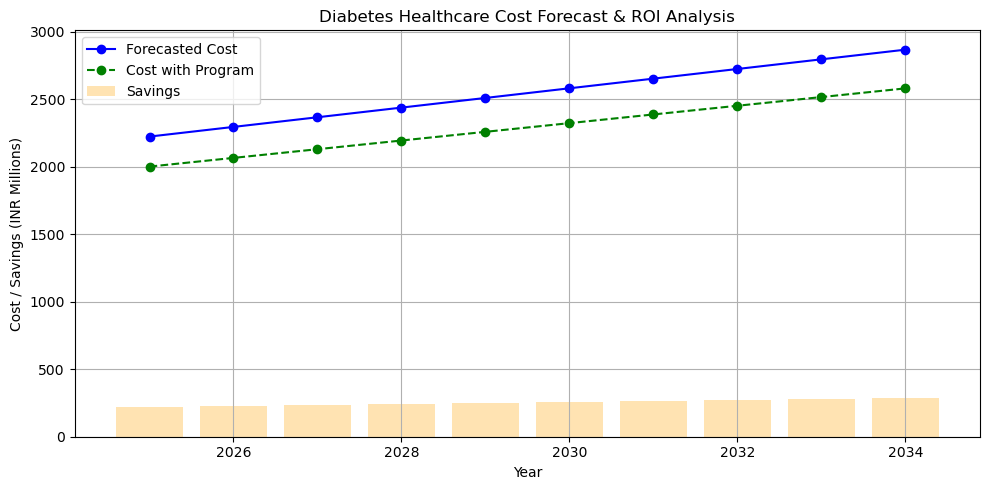

ROI plot saved at: C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 Plots\forecast_roi_plot.png


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Plot forecasted cost
plt.plot(df_forecast['year'], df_forecast['forecast_cost_INR_millions'], marker='o', color='blue', label='Forecasted Cost')

# Plot cost with program
plt.plot(df_forecast['year'], df_forecast['cost_with_program'], marker='o', color='green', linestyle='--', label='Cost with Program')

# Plot savings as bars
plt.bar(df_forecast['year'], df_forecast['savings'], alpha=0.3, color='orange', label='Savings')

plt.xlabel('Year')
plt.ylabel('Cost / Savings (INR Millions)')
plt.title('Diabetes Healthcare Cost Forecast & ROI Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure
plot_roi_path = r"C:\Users\kanwa\Desktop\Health economics Projects\Health Economics P2_Forecasting ROI\P2 Plots\forecast_roi_plot.png"
plt.savefig(plot_roi_path)
plt.show()
print(f"ROI plot saved at: {plot_roi_path}")
